# Escola de Dados - Python para inovação cívica
## Módulo 1: Noções básicas de estatística descritiva e pré-processamento

- [Aula 8](#Aula-8:-Introdução-a-estatística)
- [Aula 9](#Aula-9:-Medidas-de-tendência-central-e-dispersão)
- [Aula 10](#Aula-10:-Outliers-e-valores-faltantes)
- [Aula 12](#Aula-12:-Operações-básicas-com-python)
- [Aula 13](#Aula-13:-Métodos-`filter`-e-`sort_values`)
- [Aula 14](#Aula-14:-Operações-com-dados-e-método-`apply`)
- [Aula 15](#Aula-15:-Operações-com-dados-e-método-`groupby`)


### Aula 8: Introdução a estatística

Os dados que usaremos nesse notebook pode ser encontrado em: [TSE. Candidaturas em 2020](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1).

Trabalharemos com os dados referentes as candidaturas nos estados de Amapá e Pará.


In [6]:
import pandas as pd
import glob

In [7]:
dados_ap_pa = ['consulta_cand_2020_AP.csv', 'consulta_cand_2020_PA.csv']

In [8]:
lista_df = []

for dados_estado in dados_ap_pa:
    df_estado = pd.read_csv(dados_estado, sep=';', encoding='latin_1',  on_bad_lines='skip')
    lista_df.append(df_estado)

In [9]:
lista_df

[      DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
 0     06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 1     06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 2     06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 3     06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 4     06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 ...          ...        ...          ...              ...                ...   
 2493  06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 2494  06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 2495  06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 2496  06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 2497  06/05/2023   08:21:53         2020                2  ELEIÇÃO ORDINÁRIA   
 
       NR_TURNO  CD_ELEICA

In [10]:
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

In [11]:
# Listando a coluna dos dataframes
df_completo.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'NR_FEDERACAO',
       'NM_FEDERACAO', 'SG_FEDERACAO', 'DS_COMPOSICAO_FEDERACAO',
       'SQ_COLIGACAO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO',
       'CD_MUNICIPIO_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_IDADE_DATA_POSSE', 'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO',
       'DS_GENERO', 'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO',
       'CD_ESTAD

É possível criar um dataframe apenas com os dados de candidaturas para as Câmeras de Vereados dos estados.

In [12]:
df_completo.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,NM_TIPO_DESTINACAO_VOTOS,CD_SITUACAO_CANDIDATO_TOT,DS_SITUACAO_CANDIDATO_TOT,ST_PREST_CONTAS
0,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6001110820206030012,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
1,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6001035220206030005,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
2,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6000878020206030011,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S
3,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6002661420206030011,4,INDEFERIDO COM RECURSO,4,INDEFERIDO COM RECURSO,SIM,Anulado sub judice,4,Indeferido com recurso,S
4,06/05/2023,08:21:53,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,...,6001321720206030001,2,DEFERIDO,2,DEFERIDO,SIM,Válido,2,Deferido,S


In [13]:
df_completo['CD_CARGO'].value_counts()

13    24583
12      800
11      770
Name: CD_CARGO, dtype: int64

In [14]:
df_vereadores = df_completo[df_completo['CD_CARGO'] == 13].copy()

In [ ]:
# Listando a coluna dos dataframes
df_vereadores.columns

O método `pd.describe` traz um quadro com algumas medidas da estatística descritiva, como as medidas de tendência central, medidas de dispersão e quartis, excluindo os valores NaN (not a number).

In [16]:
df_vereadores.shape

(24583, 71)

In [17]:
df_vereadores.describe()

,ANO_ELEICAO,CD_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,SG_UE,CD_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NR_CPF_CANDIDATO,CD_SITUACAO_CANDIDATURA,...,CD_ESTADO_CIVIL,CD_COR_RACA,CD_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,CD_SITUACAO_CANDIDATO_TOT
count,24583.0,24583.0,24583.0,24583.000000,24583.000000,24583.0,2.458300e+04,24583.000000,2.458300e+04,24583.000000,...,24583.000000,24583.000000,24583.000000,24583.000000,24583.000000,24583.0,2.458300e+04,24583.000000,24583.000000,24583.000000
mean,2020.0,2.0,1.0,426.408860,4934.148314,13.0,1.296959e+11,31086.054875,4.780648e+10,11.494773,...,2.224952,2.596022,552.461376,59365.732494,4.288614,-1.0,6.002713e+18,2.055974,2.088679,2.106374
std,0.0,0.0,0.0,2.757078,663.648303,0.0,3.205320e+10,20829.576759,3.104649e+10,2.071706,...,1.837225,0.888529,326.046922,93041.750641,1.283715,0.0,1.704343e+15,1.468889,1.624685,1.618616
min,2020.0,2.0,1.0,426.000000,4006.000000,13.0,3.000063e+10,10000.000000,-4.000000e+00,3.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-1.000000,-1.0,6.000168e+18,-1.000000,-1.000000,-1.000000
25%,2020.0,2.0,1.0,426.000000,4332.000000,13.0,1.400008e+11,15015.000000,1.955834e+10,12.000000,...,1.000000,2.000000,265.000000,15568.960000,4.000000,-1.0,6.001442e+18,2.000000,2.000000,2.000000
50%,2020.0,2.0,1.0,426.000000,4774.000000,13.0,1.400009e+11,22300.000000,5.162824e+10,12.000000,...,1.000000,3.000000,541.000000,24713.500000,5.000000,-1.0,6.002299e+18,2.000000,2.000000,2.000000
75%,2020.0,2.0,1.0,426.000000,5517.000000,13.0,1.400011e+11,45133.000000,7.379923e+10,12.000000,...,3.000000,3.000000,999.000000,53698.780000,5.000000,-1.0,6.003640e+18,2.000000,2.000000,2.000000
max,2020.0,2.0,1.0,445.000000,6173.000000,13.0,1.400013e+11,90999.000000,9.998375e+10,12.000000,...,9.000000,6.000000,999.000000,438043.030000,5.000000,-1.0,6.016571e+18,20.000000,20.000000,20.000000


Para gerar relatórios interativos em HTML a partir de um dataframe do pandas usaremos a biblioteca Pandas Profiling, com ele para cada coluna será apresentado estatístico correspondente ao tipo de dado.

In [18]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 70.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cee3ff410703f9f533b898f260c2fcd3fa6cc82e2c21e515f95b8f92dd430b9c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [19]:
import numpy as np
from pandas_profiling import ProfileReport

<ipython-input-19-d8b5cb9fc015>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [20]:
profile = ProfileReport(df_vereadores, title="Introdução - Pandas Profiling Report")

In [ ]:
profile.to_file(output_file="relatorio_eleicoes_vereadores_2020_ap_pa.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Em AP e PA, houveram quantas candidaturas para a prefeitura?

In [21]:
df_vereadores['CD_CARGO'].value_counts()

13    24583
Name: CD_CARGO, dtype: int64

### Aula 9: medidas de tendência central e dispersão

As medidas de tendência central servem para determinar o valor central de uma distribuição. Vamos explorar mais um pouco nosso dataframe e descobrir qual a moda (valor que mais se repete) da colina 'SG_PARTIDO'

In [22]:
df_vereadores['SG_PARTIDO'].value_counts()

MDB              2234
PSC              1700
PL               1669
PSD              1613
PSDB             1539
PT               1473
REPUBLICANOS     1462
DEM              1246
PDT              1229
PSB              1171
PTB              1025
PODE              839
PROS              762
PP                752
CIDADANIA         735
PATRIOTA          638
AVANTE            626
SOLIDARIEDADE     594
PSL               523
PC do B           488
PRTB              464
PV                461
PSOL              364
PTC               320
REDE              203
DC                186
PMN               127
PMB               127
NOVO                8
PSTU                3
UP                  2
Name: SG_PARTIDO, dtype: int64

In [23]:
df_vereadores['SG_PARTIDO'].mode()

0    MDB
Name: SG_PARTIDO, dtype: object

A média aritmética da coluna 'NR_IDADE_DATA_POSSE' é:

In [24]:
df_vereadores['NR_IDADE_DATA_POSSE'].mean()

43.164185176145146

Continuando a explorar a idade das pessoas candidatas na data da posse, queremos saber qual é o valor que ocupa a posição central do conjunto de dados, após a ordenação dos valores (mediana).


In [25]:
df_vereadores['NR_IDADE_DATA_POSSE'].median()

43.0

Qual a variância do dado 'NR_IDADE_DATA_POSSE'?

In [26]:
df_vereadores['NR_IDADE_DATA_POSSE'].var()

118.23389400874976

Qual o desvio padrão do dado 'NR_IDADE_DATA_POSSE'?

In [27]:
df_vereadores['NR_IDADE_DATA_POSSE'].std()

10.873541005980975

## Qual a média, moda e mediana do 'VR_DESPESA_MAX_CAMPANHA'?

In [28]:
# Média
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].mean()

59365.73249399992

In [29]:
# Mediana
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].median()

24713.5

In [30]:
# Mode
df_vereadores['VR_DESPESA_MAX_CAMPANHA'].mode()

0    12307.75
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64

### Aula 10: Outliers e valores faltantes


De acordo com o dicionário de dados do conjunto de dados do TSE, os valores faltantes estão preenchidos com #NULO#, no entanto o Pandas não reconhece essa palavra como um missing. Faremos a substituição da string "#NULO#" pelo valor `None` nas colunas com valores categóricos.

In [31]:
colunas_categoricas = ['NM_TIPO_ELEICAO', 'DS_ELEICAO', 'TP_ABRANGENCIA', 'SG_UF', 'NM_UE', 'DS_CARGO',
                       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NM_EMAIL',
                       'DS_SITUACAO_CANDIDATURA', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'SG_PARTIDO',
                       'NM_PARTIDO', 'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'DS_NACIONALIDADE',
                       'SG_UF_NASCIMENTO', 'NM_MUNICIPIO_NASCIMENTO', 'DS_GENERO', 'DS_GRAU_INSTRUCAO',
                       'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA',
                       'DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'ST_DECLARAR_BENS', 'DS_SITUACAO_CANDIDATO_PLEITO',
                       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA'
                      ]


In [32]:
df_vereadores[colunas_categoricas] = df_vereadores.loc[:, colunas_categoricas].replace({'#NULO#': None})

In [ ]:
df_vereadores.info()

Geraremos um novo relatório usando o Pandas Profiling para visualizar as mudanças.

In [34]:
profile = ProfileReport(df_vereadores, title="Limpeza dos dados - Pandas Profiling Report")
profile.to_file(output_file="relatorio_eleicoes_vereadores_2020_ap_pa_limpo.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

### Aula 12: Operações básicas com dados

Costumamos construir um subdataframe apenas com as colunas que usaremos na nossa análise. Existem várias formas de filtrar as linhas e colunas. Vamos aprender como fazer isso separadamente:

Filtrar as 26 colunas pertinentes para nosso estudo.

In [35]:
df_vereadores_ap_pa_reduzido = df_vereadores[
    ['ANO_ELEICAO','TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
     'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NR_PARTIDO',
     'SG_PARTIDO', 'NR_IDADE_DATA_POSSE','CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA',
     'VR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
     'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND']
].copy()

In [36]:
df_vereadores_ap_pa_reduzido.shape

(24583, 26)

Agora selecionaremos apenas as pessoas que tem sua candidaturas "apto", "deferido" e "deferido com recurso".

In [37]:
df_vereadores_ap_pa_reduzido_aptas = df_vereadores_ap_pa_reduzido[
    df_vereadores_ap_pa_reduzido['CD_SITUACAO_CANDIDATURA'] == 12
]

In [ ]:
df_vereadores_ap_pa_reduzido_aptas

In [39]:
df_vereadores_ap_pa_reduzido_aptas_deferidas = df_vereadores_ap_pa_reduzido_aptas[
    (df_vereadores_ap_pa_reduzido_aptas['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') |
    (df_vereadores_ap_pa_reduzido_aptas['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')
]

In [40]:
df_vereadores_ap_pa_reduzido_aptas_deferidas.shape

(23089, 26)

Agora, aprenderemos a filtrar usando a função `pd.loc`:

In [41]:
colunas_desejadas = ['ANO_ELEICAO','TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
     'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO','NM_SOCIAL_CANDIDATO', 'NR_PARTIDO',
     'SG_PARTIDO', 'NR_IDADE_DATA_POSSE','CD_GENERO', 'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA',
     'VR_DESPESA_MAX_CAMPANHA', 'CD_SIT_TOT_TURNO','DS_SIT_TOT_TURNO', 'ST_REELEICAO', 'CD_SITUACAO_CANDIDATURA',
     'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND']

In [42]:
filtro_linhas = (df_vereadores['CD_SITUACAO_CANDIDATURA'] == 12) & (
    (df_vereadores['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') |
    (df_vereadores['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO')
)

In [ ]:
filtro_linhas

In [44]:
df_vereadores_ap_pa_reduzido_aptas_deferidas_2 = df_vereadores.loc[filtro_linhas, colunas_desejadas]

In [ ]:
df_vereadores_ap_pa_reduzido_aptas_deferidas_2.shape

In [46]:
df_vereadores_ap_pa = df_vereadores_ap_pa_reduzido_aptas_deferidas_2.copy()

## Sua vez, crie um dataframe com apenas os nomes e partidos das pessoas candidatas que se autodeclararam como 'PARDA', 'PRETA' e 'INDÍGENA'

In [47]:
colunas_desejadas = []

In [48]:
colunas_desejadas = ['NM_CANDIDATO','NM_PARTIDO']

In [49]:
colunas_desejadas

['NM_CANDIDATO', 'NM_PARTIDO']

In [50]:
filtro_linhas = (( df_vereadores['DS_COR_RACA'] == 'PARDA') | ( df_vereadores['DS_COR_RACA'] == 'PRETA') | ( df_vereadores['DS_COR_RACA'] == 'INDIGENA'))

In [ ]:
filtro_linhas

In [52]:
df_vereadores_declaradas_cota = df_vereadores.loc[filtro_linhas, colunas_desejadas]

In [ ]:
df_vereadores_declaradas_cota

### Aula 13: Métodos `filter` e `sort_values`

Vamos filtrar todas as colunas que possuam as letras "DIDATO" no seu título:

In [ ]:
df_vereadores_ap_pa_nomes = df_vereadores_ap_pa.filter(like='DIDATO', axis=1)
df_vereadores_ap_pa_nomes.head()

Para ordenar as linhas a partir das colunas 'NM_SOCIAL_CANDIDATO' e 'NM_CANDIDATO, usamos o método df.sort_values:

In [ ]:
# sort_values ordena valores no eixo desejado
df_vereadores_ap_pa_nomes.sort_values(by=['NM_SOCIAL_CANDIDATO', 'NM_CANDIDATO'], # coluna ou lista de colunas usada para ordenação dos dados. A ordem informa a prioridade na ordenação
                                      ascending=True, # Define a ordem dos valores ( crescente ( True ), ou decrescente ( False))
                                      na_position='last', # Define se os valores faltantes estarão no topo ( 'first' ) ou final da linha ( 'las' )
                                      ignore_index=False, # Estabelece se haverá reindexação das linhas ( True ) ou não ( False )
)

## Selecione apenas as colunas cujo o título possua "DS" e organize em ordem descrescente. Qual o gênero das candidaturas das 3 primeiras linhas?

In [56]:
df_vereadores_ap_pa_generos = df_vereadores_ap_pa.filter(like='DS', axis=1 )

In [ ]:
df_vereadores_ap_pa_generos.sort_values(by=['DS_GENERO'],
                                        ascending = False,
                                        ignore_index=False
                                        ).head(3)

### Aula 14: Operações com dados e método `apply`

Podemos criar uma nova coluna a partir de operações sobre outras colunas. No exemplo abaixo vamos descobrir o gasto médio diário declarado por cada candidatura.

In [58]:
total_dias_campanha = 45
df_vereadores_ap_pa['GASTO_DIARIO'] = df_vereadores_ap_pa['VR_DESPESA_MAX_CAMPANHA'] / total_dias_campanha

In [67]:
df_vereadores_ap_pa.head()

,ANO_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,...,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,GASTO_DIARIO
0,2020,MUNICIPAL,AP,6114,FERREIRA GOMES,13,VEREADOR,11369,RAIMUNDO MESQUITA FERREIRA DOS SANTOS,GOIABA,...,PRETA,12307.75,5,SUPLENTE,N,12,APTO,2,DEFERIDO,273.505556
1,2020,MUNICIPAL,AP,6076,MAZAGÃO,13,VEREADOR,13000,MAURICIO DEL CASTILLO RAIOL,MAURICIO DA SAÚDE,...,PARDA,24149.88,4,NÃO ELEITO,N,12,APTO,2,DEFERIDO,536.664000
2,2020,MUNICIPAL,AP,6106,SERRA DO NAVIO,13,VEREADOR,55123,KENNAS DE OLIVEIRA DOS SANTOS,NEGUINHO DO TAXI,...,PRETA,12307.75,5,SUPLENTE,N,12,APTO,2,DEFERIDO,273.505556
4,2020,MUNICIPAL,AP,6017,AMAPÁ,13,VEREADOR,12111,MAURÍCIO DE OLIVEIRA SUCUPIRA,MAURÍCIO SUCUPIRA,...,PARDA,12307.75,2,ELEITO POR QP,N,12,APTO,2,DEFERIDO,273.505556
5,2020,MUNICIPAL,AP,6050,MACAPÁ,13,VEREADOR,17222,ADRIANO DOS SANTOS SILVA,ADRIANO SILVA,...,PARDA,151743.76,5,SUPLENTE,N,12,APTO,2,DEFERIDO,3372.083556


Explorando mais um pouco esses dados, trabalharemos apenas com os dados das candidaturas de Pernambuco e classificaremos os gastos médios diários de acordo com os conceitos de quartil e valores discrepantes que vimos nos vídeos sobre estatística:

In [68]:
df_vereadores_pa = df_vereadores_ap_pa[df_vereadores_ap_pa['SG_UF'] == 'PA'].copy()

In [69]:
primeiro_quartil = df_vereadores_pa['GASTO_DIARIO'].quantile(0.25)
terceiro_quartil = df_vereadores_pa['GASTO_DIARIO'].quantile(0.75)

In [70]:
intervalo_interquartil = terceiro_quartil - primeiro_quartil

In [71]:
limite_inferior = primeiro_quartil - (intervalo_interquartil * 1.5)
limite_superior = terceiro_quartil + (intervalo_interquartil * 1.5)

In [72]:
def classificacao_gasto(row):
    if row < limite_inferior:
        return 'muito abaixo da média'
    elif row >= limite_inferior and row < primeiro_quartil:
        return 'abaixo da média'
    elif row >= primeiro_quartil and row <= terceiro_quartil:
        return 'na média'
    elif row > terceiro_quartil and row <= limite_superior:
        return 'acima da média'
    else:
        return 'muito acima da média'

In [75]:
df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'] = df_vereadores_pa['GASTO_DIARIO'].apply(classificacao_gasto)

In [ ]:
df_vereadores_pa.head()

Para facilitar a visualização faremos um gráfico de barras usando a biblioteca matplotlib:

In [73]:
from matplotlib import pyplot as plt

In [77]:
# guarda na variável "classificacao" uma lista com os rótulos usados para classificar os gastos
classificacao = df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'].unique().tolist()

In [78]:
#guarda na variável "total_por_classificacao" uma lista a quantidade de ocorrência de cada rótulo
total_por_classificacao = df_vereadores_pa['CLASSIFICACAO_GASTO_DIARIO'].value_counts().to_list()

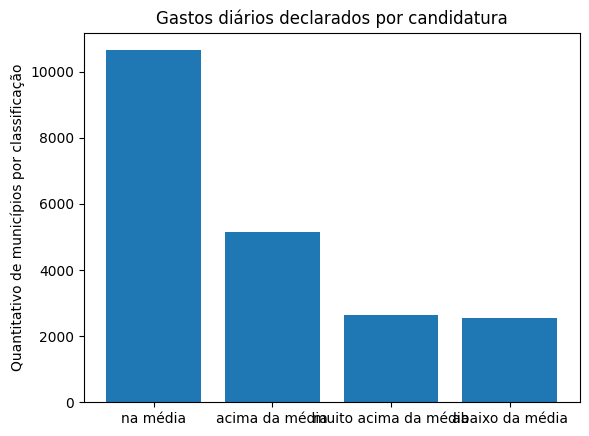

In [79]:
plt.bar(classificacao, total_por_classificacao)
plt.title('Gastos diários declarados por candidatura')
plt.ylabel('Quantitativo de municípios por classificação')

plt.show()

### Aula 15: Operações com dados e método `groupby`

Usando o método groupby podemos agrupar dados segundo informações de uma coluna e fazer operações com o agrupamento.

As perguntas que queremos responder são: quantas mulheres são candidatas? Qual a distribuição de pessoas por grupo racial? Quantidade de mulheres por grupo racial? E qual partido tem mais mulheres em cada grupo racial?


In [80]:
colunas_desejadas = ['SG_PARTIDO', 'DS_GENERO', 'DS_COR_RACA']
filtro = df_vereadores_ap_pa['SG_UF'] == 'AP'

In [82]:
df_vereadores_ap_sexo_raca = df_vereadores_ap_pa.loc[filtro, colunas_desejadas]

In [83]:
df_vereadores_ap_sexo_raca.head()

,SG_PARTIDO,DS_GENERO,DS_COR_RACA
0,PP,MASCULINO,PRETA
1,PT,MASCULINO,PARDA
2,PSD,MASCULINO,PRETA
4,PDT,MASCULINO,PARDA
5,PSL,MASCULINO,PARDA


Agrupando por gênero, quantas candidaturas temos em cada um?

In [84]:
df_vereadores_ap_sexo_raca.groupby(['DS_GENERO']).count()

,SG_PARTIDO,DS_COR_RACA
DS_GENERO,,
FEMININO,765,765
MASCULINO,1349,1349


E por raça?

In [85]:
df_vereadores_ap_sexo_raca.groupby(['DS_COR_RACA']).count()

,SG_PARTIDO,DS_GENERO
DS_COR_RACA,,
AMARELA,3,3
BRANCA,300,300
INDÍGENA,22,22
NÃO INFORMADO,4,4
PARDA,1544,1544
PRETA,241,241


Da candidaturas do gênero feminino, quantas temos em cada grupo racial?

In [86]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'FEMININO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).count()

SG_PARTIDO
DS_GENERO DS_COR_RACA              
FEMININO  AMARELA                 2
          BRANCA                103
          INDÍGENA                5
          NÃO INFORMADO           1
          PARDA                 575
          PRETA                  79

Entre as candidaturas do gênero feminino, quais os partidos com maior número de representação em cada grupo racial?

In [87]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'FEMININO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).max()

SG_PARTIDO
DS_GENERO DS_COR_RACA                 
FEMININO  AMARELA                  PTB
          BRANCA         SOLIDARIEDADE
          INDÍGENA        REPUBLICANOS
          NÃO INFORMADO            PDT
          PARDA          SOLIDARIEDADE
          PRETA           REPUBLICANOS

## Agora é a sua vez, entre as candidaturas do sexo masculino, quais os partidos com o menor número de representantes em cada grupo racial?

In [89]:
df_vereadores_ap_sexo_raca[df_vereadores_ap_sexo_raca['DS_GENERO'] == 'MASCULINO'].groupby(
    ['DS_GENERO', 'DS_COR_RACA']).min()

SG_PARTIDO
DS_GENERO DS_COR_RACA             
MASCULINO AMARELA             PRTB
          BRANCA            AVANTE
          INDÍGENA             DEM
          NÃO INFORMADO        MDB
          PARDA             AVANTE
          PRETA          CIDADANIA